In [1]:
import os
os.getcwd()

'C:\\Users\\Vishal Gardas\\Desktop\\Programming\\P work\\Tesla Stocks'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import table
import datetime as dt

In [3]:
tesla = pd.read_csv("tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.shape

(2416, 7)

In [5]:
tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f'%x)

In [8]:
tesla.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,nan,nan,nan,nan,nan,nan
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan
first,2010-06-29 00:00:00,nan,nan,nan,nan,nan,nan
last,2020-02-03 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [9]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027413CB6588>,
      dtype=object)

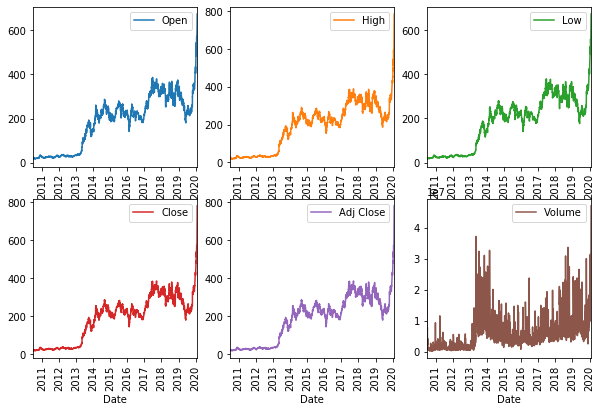

In [10]:
column = ['Open', 'High', 'Low','Close','Adj Close','Volume']
tesla.plot(x='Date', y = column, subplots = True, layout = (3,3), figsize = (10,10), sharex = False, rot = 90)

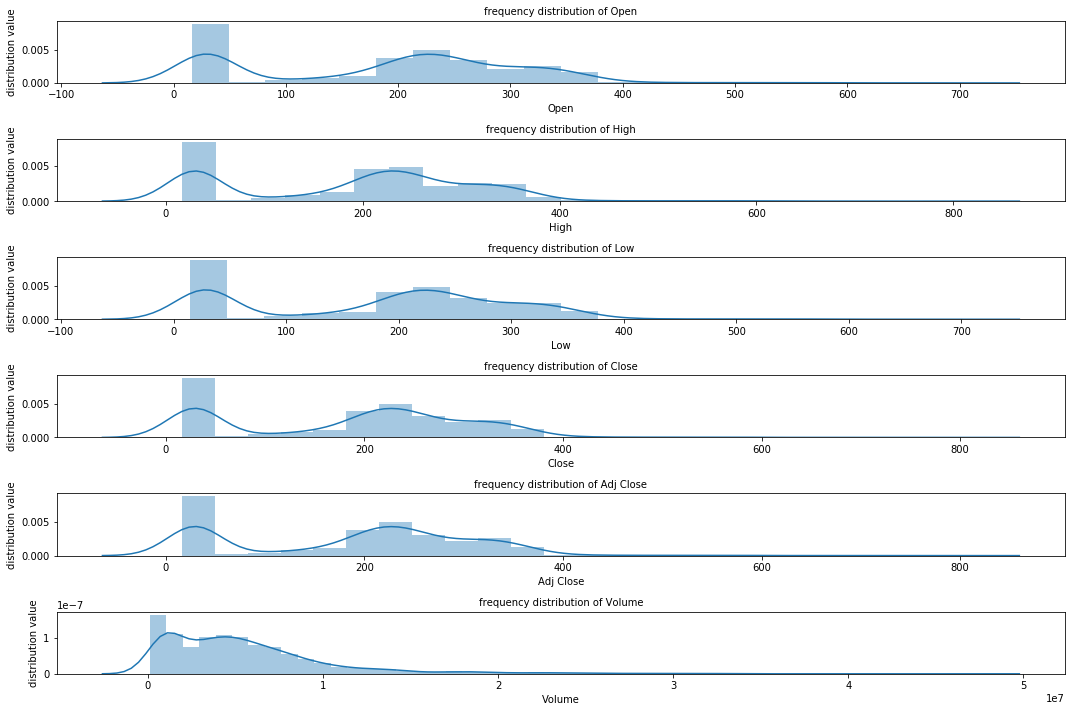

In [11]:
fig, ax = plt.subplots(len(column), figsize = (15,10))

for i, col_list in enumerate(column):
    sns.distplot(tesla[col_list], hist = True, ax = ax[i])
    ax[i].set_title('frequency distribution of' + " "+ col_list, fontsize = 10)
    ax[i].set_xlabel(col_list, fontsize = 10)
    ax[i].set_ylabel('distribution value', fontsize = 10)
    fig.tight_layout (pad = 1.1)
    

In [12]:
corr_matrix = tesla.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


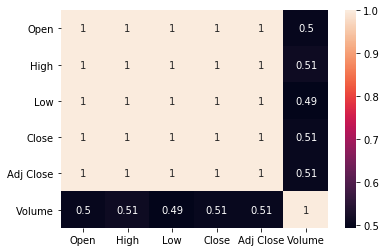

In [13]:
sns.heatmap(tesla.corr(), annot=True)

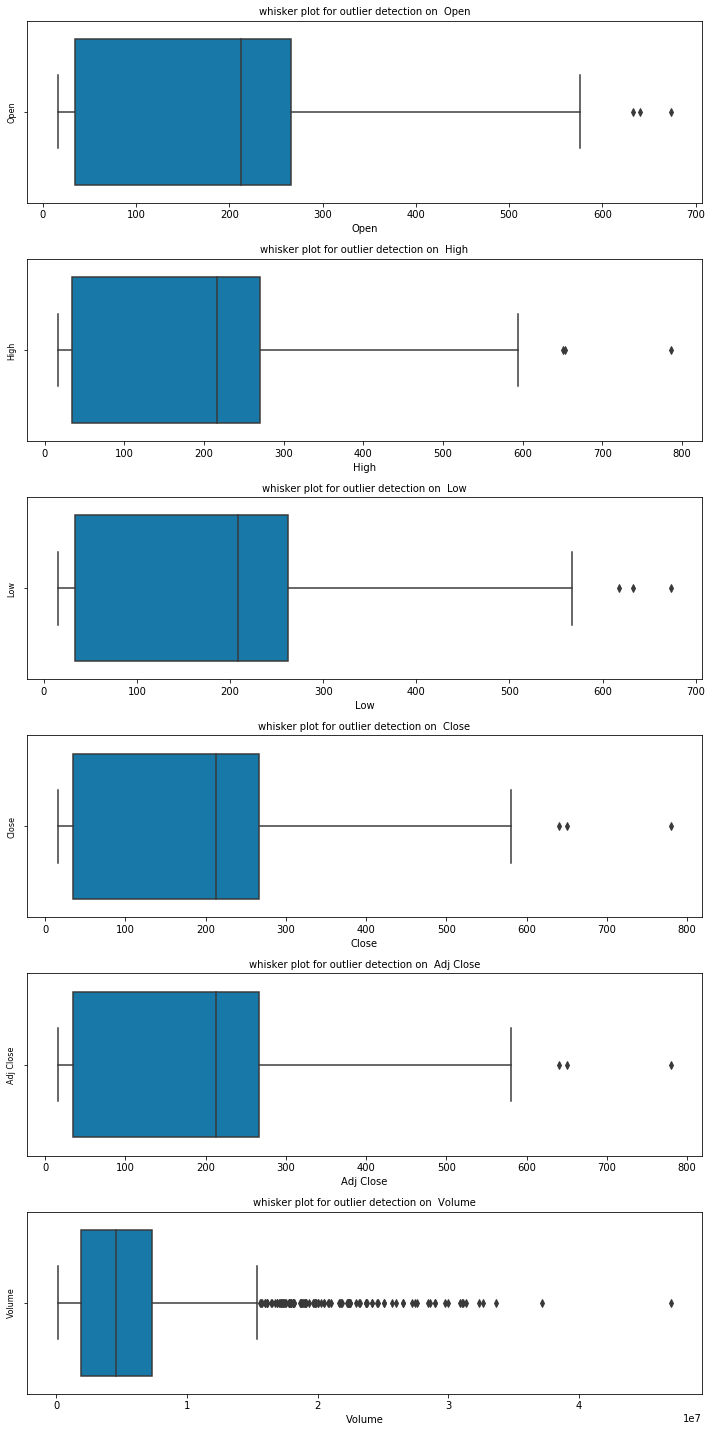

In [14]:
fig, ax = plt.subplots(len(column), figsize = (10,20))

for i, col_list in enumerate(column):
    sns.boxplot(tesla[col_list], ax = ax[i], palette = 'winter', orient = 'h')
    ax[i].set_title('whisker plot for outlier detection on '+" "+col_list, fontsize=10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad=1.1)


In [15]:
desc = tesla.describe()
desc = desc.T
desc['IQR']=desc['75%']-desc['25%']
tesla = tesla[(np.abs(stats.zscore(tesla[['Open', 'High', 'Low','Close','Adj Close', 'Volume']]))<3).all(axis=1)]
tesla = tesla.reset_index()

In [16]:
tesla

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
5,5,2010-07-07,16.40,16.63,14.98,15.80,15.80,6921700
6,6,2010-07-08,16.14,17.52,15.57,17.46,17.46,7711400
7,7,2010-07-09,17.58,17.90,16.55,17.40,17.40,4050600
8,8,2010-07-12,17.95,18.07,17.00,17.05,17.05,2202500
9,9,2010-07-13,17.39,18.64,16.90,18.14,18.14,2680100


In [17]:
tesla.drop('index', axis =1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
5,2010-07-07,16.40,16.63,14.98,15.80,15.80,6921700
6,2010-07-08,16.14,17.52,15.57,17.46,17.46,7711400
7,2010-07-09,17.58,17.90,16.55,17.40,17.40,4050600
8,2010-07-12,17.95,18.07,17.00,17.05,17.05,2202500
9,2010-07-13,17.39,18.64,16.90,18.14,18.14,2680100


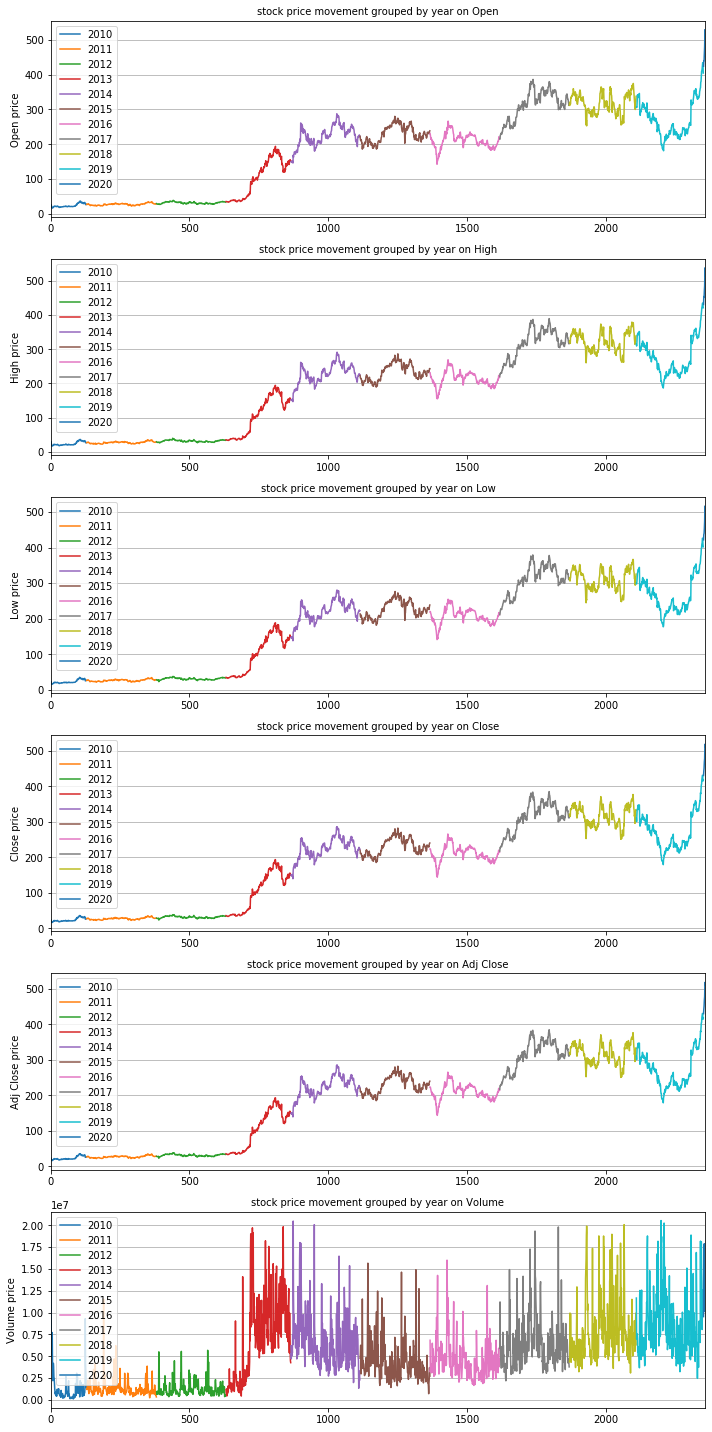

In [18]:
tesla['Year']=tesla['Date'].dt.year
tesla['Month']=tesla['Date'].dt.month
tesla['WeekDay']=tesla['Date'].dt.weekday

fig, ax = plt.subplots(len(column), figsize = (10,20))
for i, col_list in enumerate(column):
    tesla.groupby("Year")[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("stock price movement grouped by year on"+" "+col_list, fontsize =10)
    ax[i].set_ylabel(col_list+" "+"price", fontsize=10)
    fig.tight_layout(pad=1.1)
    ax[i].yaxis.grid(True)

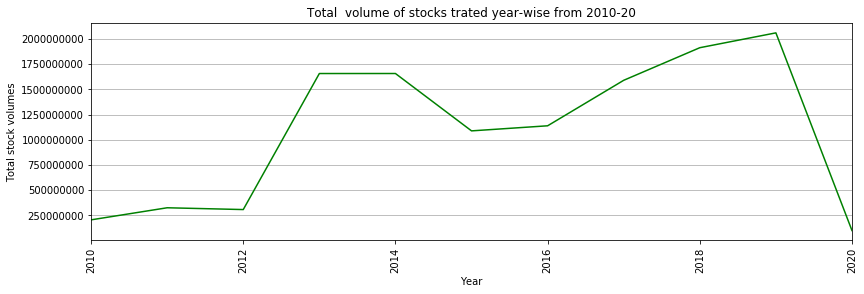

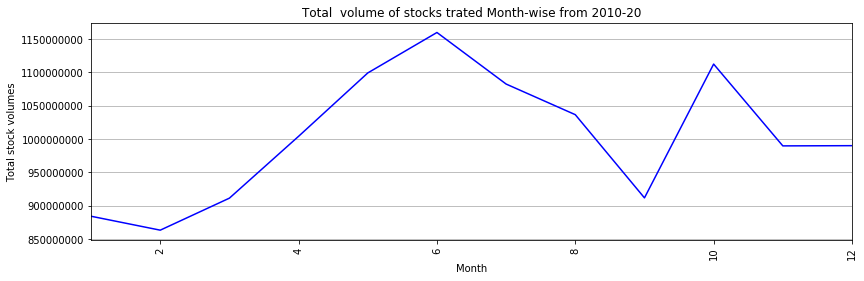

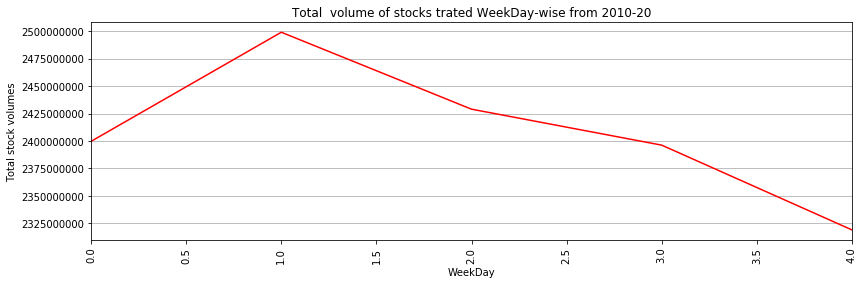

In [24]:
check = tesla.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30,4))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend = False, fontsize = 10, sharex = False, title = 'Total  volume of stocks trated year-wise from 2010-20', rot = 90, color = 'green')
ax1.ticklabel_format(useOffset= False, style = 'plain')
ax1.set_ylabel('Total stock volumes')
ax1.yaxis.grid(True)

check = tesla.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30,4))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend = False, fontsize = 10, sharex = False, title = 'Total  volume of stocks trated Month-wise from 2010-20', rot = 90, color = 'blue')
ax1.ticklabel_format(useOffset= False, style = 'plain')
ax1.set_ylabel('Total stock volumes')
ax1.yaxis.grid(True)

check = tesla.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30,4))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend = False, fontsize = 10, sharex = False, title = 'Total  volume of stocks trated WeekDay-wise from 2010-20', rot = 90, color = 'red')
ax1.ticklabel_format(useOffset= False, style = 'plain')
ax1.set_ylabel('Total stock volumes')
ax1.yaxis.grid(True)

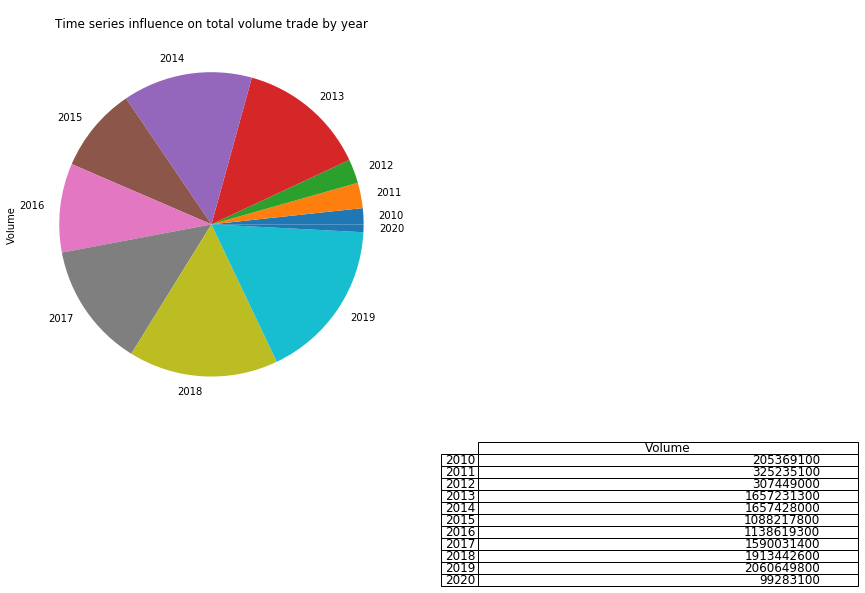

In [33]:
for i, col_list in enumerate(column):
    var = tesla.groupby('Year')[col_list].sum()


var = pd.DataFrame(var)

plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
var.plot(kind = 'pie', y = 'Volume', legend = False, fontsize = 10, sharex = False, title = "Time series influence on total volume trade by year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, var, loc = 'centre')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

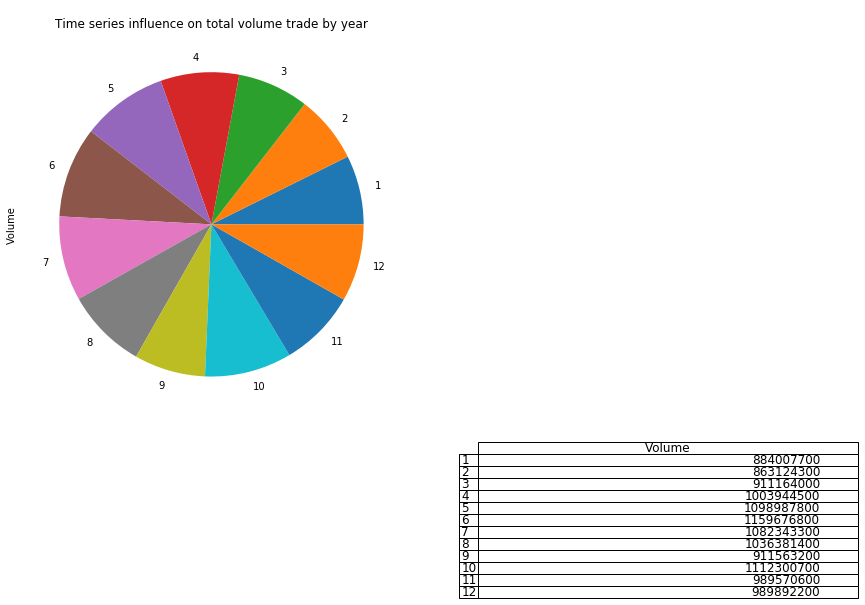

In [34]:
for i, col_list in enumerate(column):
    var = tesla.groupby('Month')[col_list].sum()


var = pd.DataFrame(var)

plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
var.plot(kind = 'pie', y = 'Volume', legend = False, fontsize = 10, sharex = False, title = "Time series influence on total volume trade by year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, var, loc = 'centre')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

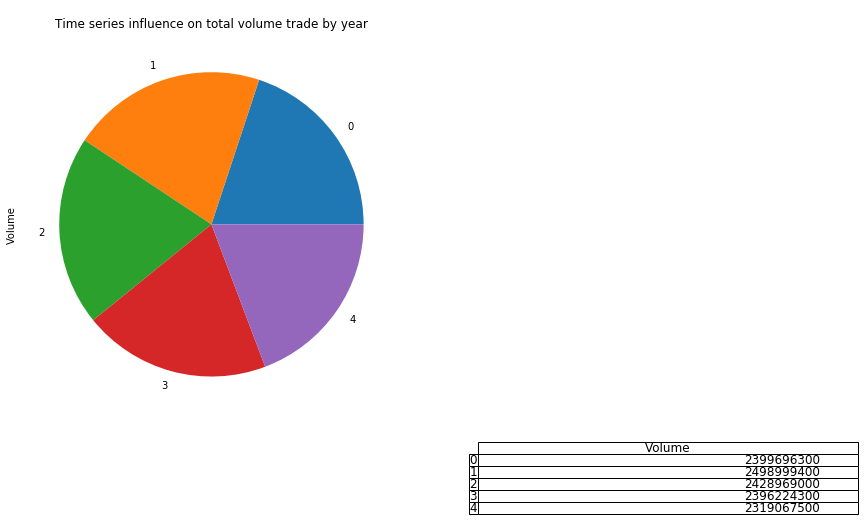

In [35]:
for i, col_list in enumerate(column):
    var = tesla.groupby('WeekDay')[col_list].sum()


var = pd.DataFrame(var)

plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
var.plot(kind = 'pie', y = 'Volume', legend = False, fontsize = 10, sharex = False, title = "Time series influence on total volume trade by year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, var, loc = 'centre')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()